<a href="https://colab.research.google.com/github/Shikha-Srikumar/Shikha-Srikumar/blob/main/Copy_of_20thSept_USHoneyCS_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Background / Scenario**#


**US Honey Case Study**

**PREFACE**

  **In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America from 1998 to 2021.**

### **Link to dataset: https://drive.google.com/file/d/1SATuLNBTJ-yHrLB_jx0idXascGt2G3oH/view?usp=sharing**

#**OBJECTIVE**#

****Visualize how the honey production is changed over the year (1998 - 2021) in US****

#**QUESTION**#

**How has honey production yield changed from 1998 to 2016?**

**Over time, what are the major production trends been across the states?**

**Are there any patterns that can be observed between total honey production and value of production every year?**

**How has value of production, which in some sense could be tied to demand, changed every year?**

<hr>

# **Step 1 - Importing the libraries**

#### **Configuration Libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#### **General - Purpose Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<hr>

# **Step 2 - Data Loading and Inspection Phase**

#### **Data Loading**

In [ ]:
df = pd.read_csv("/content/US_honey_dataset.csv")

#### **Data Inspection**
  * **This is the process using which you take a overview / a rough idea about the data, by looking at it at first instance**

In [ ]:
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


* **Insights**
  * **`Unnamed: 0` it is not relevant to us, we can drop this**
  * **The only column that is object or string in nature is `state` columns**

**Dropping the `Unnamed: 0` column**
  * **For dropping columns your axis = 1**
  * **For dropping the rows your axis = 0**

In [ ]:
df = df.drop("Unnamed: 0", axis = 1)

In [ ]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


##### **Data Information**
  * **The only function that can be used is `info()`**
  * **`describe()` when you want the statistical idea of the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.8+ KB


**Insight**
* **There is no null values in the dataset**
* **As confirmed earlier, the dataset is having majority of numerical columns**
* **The datatype of the year column should not be integer**

* **We want to convert the year column into different datatype**

In [ ]:
df["year"] = df["year"].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   state                1115 non-null   object  
 1   colonies_number      1115 non-null   int64   
 2   yield_per_colony     1115 non-null   int64   
 3   production           1115 non-null   int64   
 4   stocks               1115 non-null   int64   
 5   average_price        1115 non-null   float64 
 6   value_of_production  1115 non-null   int64   
 7   year                 1115 non-null   category
dtypes: category(1), float64(1), int64(5), object(1)
memory usage: 63.4+ KB


In [ ]:
help(df.astype)

Help on method astype in module pandas.core.generic:

astype(dtype, copy: 'bool_t | None' = None, errors: 'IgnoreRaise' = 'raise') -> 'Self' method of pandas.core.frame.DataFrame instance
    Cast a pandas object to a specified dtype ``dtype``.
    
    Parameters
    ----------
    dtype : str, data type, Series or Mapping of column name -> data type
        Use a str, numpy.dtype, pandas.ExtensionDtype or Python type to
        cast entire pandas object to the same type. Alternatively, use a
        mapping, e.g. {col: dtype, ...}, where col is a column label and dtype is
        a numpy.dtype or Python type to cast one or more of the DataFrame's
        columns to column-specific types.
    copy : bool, default True
        Return a copy when ``copy=True`` (be very careful setting
        ``copy=False`` as changes to values then may propagate to other
        pandas objects).
    errors : {'raise', 'ignore'}, default 'raise'
        Control raising of exceptions on invalid data for 

##### **Statistical Information**

In [ ]:
df.describe().T  # Transpose

,count,mean,std,min,25%,50%,75%,max
colonies_number,1115.0,6.243857e+04,9.264818e+04,2000.0,9000.0,26000.0,69000.0,550000.0
yield_per_colony,1115.0,5.974350e+01,1.994050e+01,19.0,45.0,57.0,71.0,155.0
production,1115.0,2.851268e+06,5.561202e+06,12000.0,246000.0,828000.0,2700000.0,39060000.0
stocks,1115.0,1.172625e+06,2.049556e+06,9000.0,112500.0,370000.0,1253500.0,13545000.0
average_price,1115.0,1.406231e+02,1.070115e+02,1.3,70.0,128.0,193.0,874.0
value_of_production,1115.0,5.667412e+06,9.459460e+06,106000.0,1008000.0,2281000.0,5704000.0,83859000.0


**Insights**
  * **The average price of honey is $140, moreover the minimum price is \$1.3 and the maximum price is \$874**

# **Step 3 - Data Preprocessing**

#### **Null Value Check**
  **`sum()` has been used since the isnull function will return you the matrix, its difficult over there to find the null values, hence we use sum to get the exact count of the null values**

In [ ]:
df.isnull().sum()

,0
state,0
colonies_number,0
yield_per_colony,0
production,0
stocks,0
average_price,0
value_of_production,0
year,0


In [ ]:
df.isna().sum()

,0
state,0
colonies_number,0
yield_per_colony,0
production,0
stocks,0
average_price,0
value_of_production,0
year,0


* **There seems be no null values present in the data**

#### **Duplicates Check**

In [ ]:
df.duplicated().sum()

0

#### **Shape Inspection**

In [ ]:
a = df.shape

print(f"Rows: {a[0]} and columns: {a[1]}")

Rows: 1115 and columns: 8


# **Step 4 - Analysis on the data**

#### **Country Column**

In [ ]:
df["state"].nunique()

44

In [ ]:
list(df["state"].unique())

['Alabama',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'NewJersey',
 'NewMexico',
 'NewYork',
 'NorthCarolina',
 'NorthDakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'SouthCarolina',
 'SouthDakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'WestVirginia',
 'Wisconsin',
 'Wyoming']

#### **Year Column**

In [ ]:
df["year"].nunique()

27

In [ ]:
df["year"].unique()

[1995, 1996, 1997, 1998, 1999, ..., 2017, 2018, 2019, 2020, 2021]
Length: 27
Categories (27, int64): [1995, 1996, 1997, 1998, ..., 2018, 2019, 2020, 2021]

In [ ]:
2021 - 1995

26

**This dataset is having the information about 44 different states over 27 years including the 1995 and 2021**

#### **What is the analysis on the production**

In [ ]:
df2 = df.sort_values("production", ascending = False)

In [ ]:
df2

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
3,California,420000,93,39060000,4687000,60.00,23436000,1995
134,California,450000,83,37350000,12326000,62.00,23157000,1998
581,NorthDakota,390000,90,35100000,8424000,135.00,47385000,2008
622,NorthDakota,450000,77,34650000,7623000,137.00,47471000,2009
458,NorthDakota,370000,91,33670000,8418000,81.00,27273000,2005
...,...,...,...,...,...,...,...,...
769,Kentucky,3000,41,17000,17000,325.00,400000,2013
984,SouthCarolina,16000,48,15000,15000,3.17,2435000,2018
955,Alabama,6000,45,14000,14000,3.72,1004000,2018
835,Alabama,7000,47,13000,13000,383.00,1260000,2015


* **Calfornia state has been the top producing state in the late 90's while if we see North Dakota, this is the state that has been producing the highest amount of honey in recent years (2005 - 2009)**

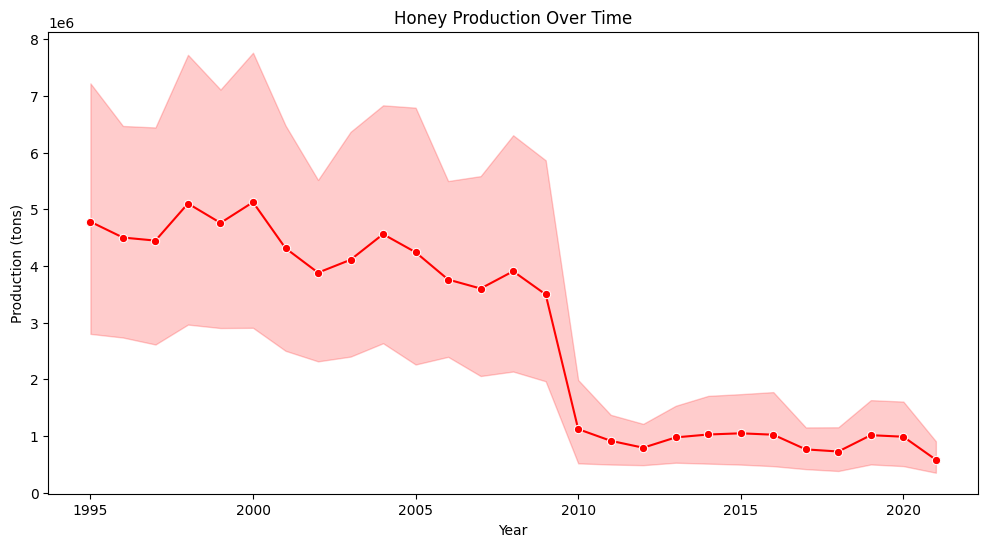

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='production', data=df, marker = "o", color = "red")
plt.title('Honey Production Over Time')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.show()

**The honey after 2009 crashed drastically, the reason for the same might be the  Colony Collapse Disorder. Following this in the year of 2010, the production dropped rapidly and continued till now to be low**

#### **Who is the highest**

In [ ]:
state_production = df.groupby('state')['production'].sum()

highest_producing_state = state_production.idxmax()
highest_production = state_production.max()

print(f"The highest producing state is {highest_producing_state} with a total production of {highest_production} tons.")

The highest producing state is NorthDakota with a total production of 513742000 tons.


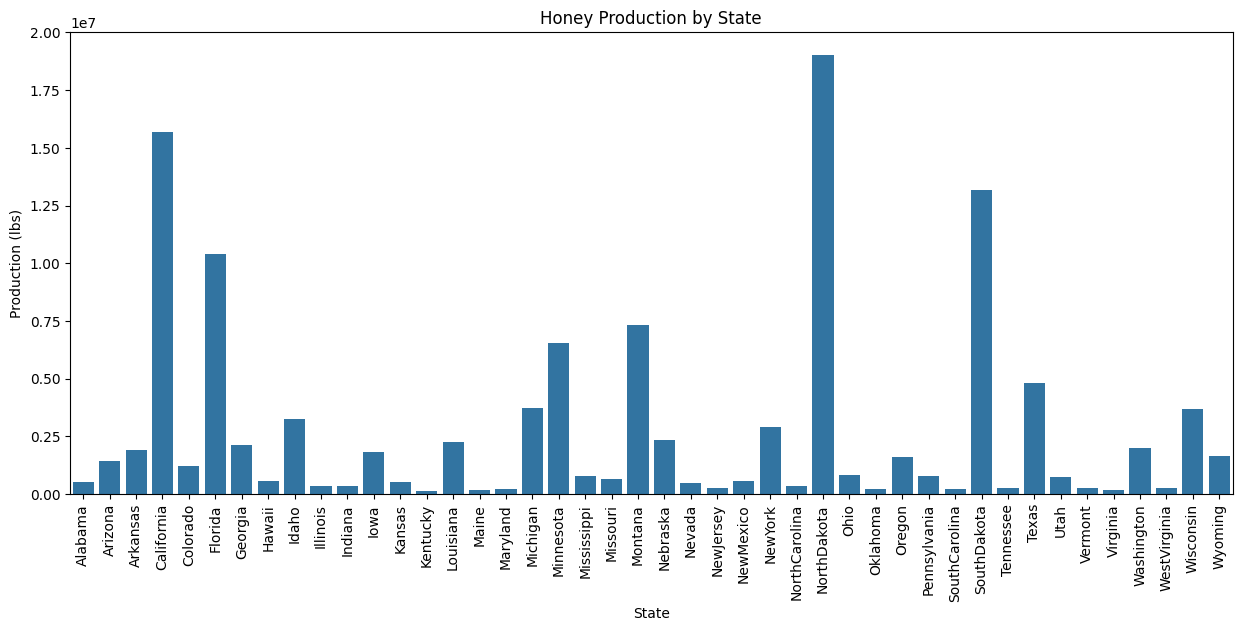

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x='state', y='production', data=df, ci = False)
plt.title('Honey Production by State')
plt.xlabel('State')
plt.ylabel('Production (lbs)')
plt.xticks(rotation=90)
plt.show()


**Insights**
  * **North Dakota, is one of the highest honey producing states, following South Dakota and Calfornia on 2nd and 3rd**
  * **Kentucky is the lowest producing state**

#### **Find the records for 2010**

In [ ]:
df_2009_2010 = df[(df["year"] == 2009) | (df["year"] == 2010)]

In [ ]:
df_2009_2010.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
595,Alabama,9000,49,441000,66000,182.0,803000,2009
596,Arizona,20000,52,1040000,562000,153.0,1591000,2009
597,Arkansas,24000,57,1368000,301000,139.0,1902000,2009
598,California,355000,33,11715000,2109000,139.0,16284000,2009
599,Colorado,28000,53,1484000,326000,140.0,2078000,2009


In [ ]:
df_2009_2010[(df_2009_2010["state"] == "NorthDakota")]

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
622,NorthDakota,450000,77,34650000,7623000,137.0,47471000,2009
662,NorthDakota,510000,91,12995000,12995000,150.0,69615000,2010


In [ ]:
df_2009_2010[(df_2009_2010["state"] == "California")]

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
598,California,355000,33,11715000,2109000,139.0,16284000,2009
639,California,410000,67,6318000,6318000,155.0,42579000,2010


In [ ]:
df_2009_2010[(df_2009_2010["state"] == "SouthDakota")]

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
626,SouthDakota,270000,66,17820000,6237000,139.0,24770000,2009
666,SouthDakota,265000,58,4765000,4765000,151.0,23209000,2010


**Based on the observation, the Co Colony Collapse Disorder has reduced the production capacity to atleast 50\% in the majority of the states and moroever, average price rises for three states**

# **Final Prospect**

### **Observation**
  * **The honey production was very good before 2005, then after 2005 the production started declining**
  * **The prices also started increasing with the decrease in the production**
  * **Though we had a very high increase in the number of colonies, still there were low production that were happening, and this might be due to the  Colony Collapse Disorder**